In [36]:
import scipy.io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, RocCurveDisplay, confusion_matrix, roc_curve

#Import Data

mat = scipy.io.loadmat('digits.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
for i in mat:
        if '__' not in i and 'readme' not in i:
              np.savetxt(("filetest.csv"),mat[i],delimiter=',')
                
df = pd.DataFrame(mat['X'])
df['label'] = mat['y']


def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

In [2]:
# Create 2 other data sets that have different pixel resolution
res16 = []
res8 = []
for i in np.arange(len(df)):
    newsize = resize(np.array(df.iloc[i,0:400]).reshape(20,20), (16,16), anti_aliasing=True).flatten()
    res16.append(newsize)
    newsize = resize(np.array(df.iloc[i,0:400]).reshape(20,20), (8,8), anti_aliasing=True).flatten()
    res8.append(newsize)
resize16 = pd.DataFrame(res16)
resize8 = pd.DataFrame(res8)

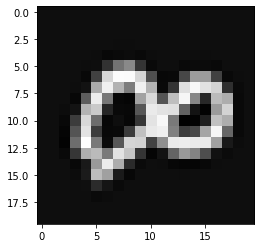

In [31]:
plt.imshow(np.array(df.iloc[4200,0:400]).reshape(20,20), interpolation='nearest', cmap='gray')
plt.savefig('20pix.png', bbox_inches='tight')

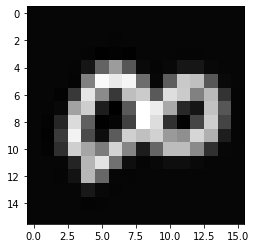

In [32]:
plt.imshow(np.array(resize16.iloc[4200,0:400]).reshape(16,16), interpolation='nearest', cmap='gray')
plt.savefig('16pix.png', bbox_inches='tight')

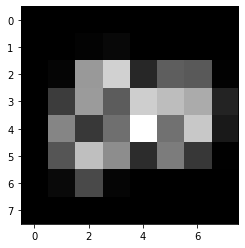

In [33]:
plt.imshow(np.array(resize8.iloc[4200,0:400]).reshape(8,8), interpolation='nearest', cmap='gray')
plt.savefig('8pix.png', bbox_inches='tight')

In [27]:
# Step 3: Spit data into training and testing, and fit the right classificaiton mdoel

# #original size (20 x 20)
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:400], df.iloc[:,-1], test_size=0.4, stratify = df.iloc[:,-1])

# # 16 x 16
# x_train, x_test, y_train, y_test = train_test_split(resize16.iloc[:, 0:400], df.iloc[:,-1], test_size=0.1, stratify = df.iloc[:,-1])

# 8 x 8
x_train, x_test, y_train, y_test = train_test_split(resize8.iloc[:, 0:400], df.iloc[:,-1], test_size=0.1, stratify = df.iloc[:,-1])

In [28]:
#run model

RndFst = RandomForestClassifier()
RndFst.fit(x_train,y_train)
rf_predictions = RndFst.predict(x_test)
rf_proba_predictions = RndFst.predict_proba(x_test)


In [29]:
filt6 = []
for i in np.arange(len(y_test)):
    if y_test.iloc[i] == 6:
        x = True
    else:
        x = False
    filt6.append(x)    

In [30]:
recall = recall_score(y_test[filt6], rf_predictions[filt6],average='micro')
precision = precision_score(y_test[filt6], rf_predictions[filt6], average='micro')
print('The Recall is:  ',recall,' and the Precision is:   ',precision, )

The Recall is:   0.98  and the Precision is:    0.98


In [38]:
#generate tpr and fpr for roc curve

rfp5 = []
for i in np.arange(len(rf_proba_predictions)):
    x = rf_proba_predictions[i][4]
    rfp5.append(x)
    
fpr5, tpr5, _ = roc_curve(y_test,  rfp5, pos_label=5)


rfp6 = []
for i in np.arange(len(rf_proba_predictions)):
    x = rf_proba_predictions[i][5]
    rfp6.append(x)    
    
fpr6, tpr6, _ = roc_curve(y_test,  rfp6, pos_label=6)    

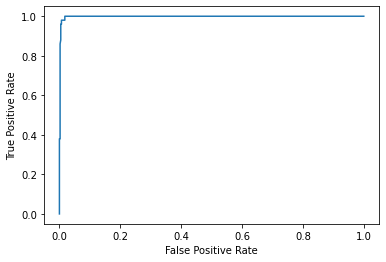

In [40]:
plt.plot(fpr6,tpr6)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc6.png', bbox_inches='tight')

Confusion matrix
[[49  0  0  0  0  0  0  1  0  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 1  2 44  0  0  1  0  2  0  0]
 [ 0  1  0 48  0  0  0  0  1  0]
 [ 0  0  2  1 44  1  0  1  0  1]
 [ 0  0  0  0  1 49  0  0  0  0]
 [ 1  0  0  0  0  0 49  0  0  0]
 [ 1  1  1  0  1  1  1 44  0  0]
 [ 1  0  0  0  0  0  4  1 44  0]
 [ 0  0  0  0  0  0  0  0  0 50]]


<Figure size 432x288 with 0 Axes>

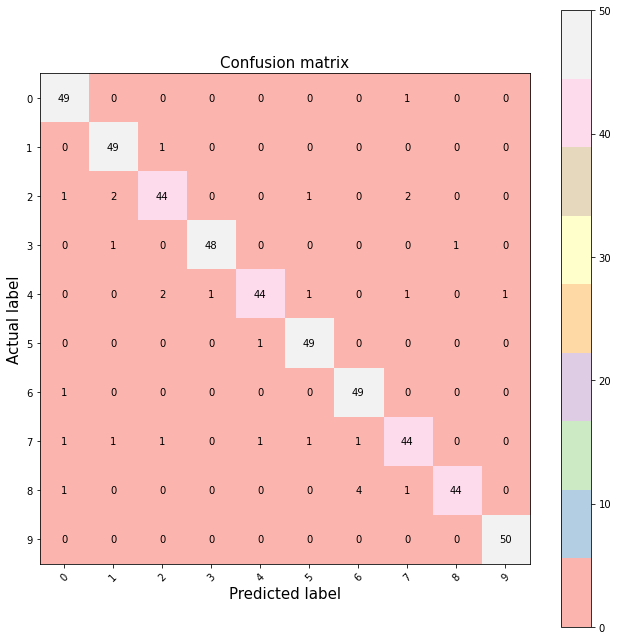

In [41]:
# confusion matrix
confusion = confusion_matrix(y_test, rf_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.savefig('digitcm.png', bbox_inches='tight')
plt.show();